# Exploratory Data Analysis(EDA) for MovieLens Dataset

####  Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the Datasets and view the Datasets

In [5]:
df1 = pd.read_csv("E:\movie_rec\src\data\movie.csv")
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### We use the `rating.csv` dataset for Collaborative Filtering 

In [3]:
rating_df = pd.read_csv("E:\\movie_rec\\src\\data\\rating.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [11]:
df3 = pd.read_csv("E:\\movie_rec\\src\\data\\tag.csv")
df3.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [10]:
df4 = pd.read_csv("E:\\movie_rec\\src\\data\\link.csv")
df4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
df5 = pd.read_csv("E:\\movie_rec\\src\\data\\genome_tags.csv")
df5.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [13]:
df5 = pd.read_csv("E:\\movie_rec\\src\\data\\genome_scores.csv")
df5.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


#### Analysing the `rating.csv` file to understand the patterns and the data

In [6]:
rating_df.shape

(20000263, 4)

In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [8]:
rating_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
rating_df.duplicated().sum()

0

In [4]:
rating_df.nunique()

userId         138493
movieId         26744
rating             10
timestamp    15351121
dtype: int64

In [ ]:
rating_df.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [ ]:
rating_df = rating_df.drop('timestamp', axis=1)

(2000, 3)

#### Plotting the Distribution of Ratings using `sns.countplot()`

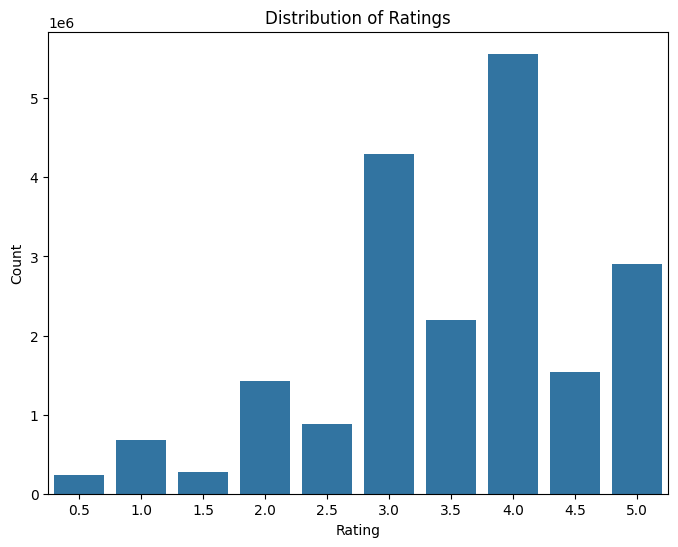

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=rating_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Plotting the Number of Ratings per User using `sns.histplot()`

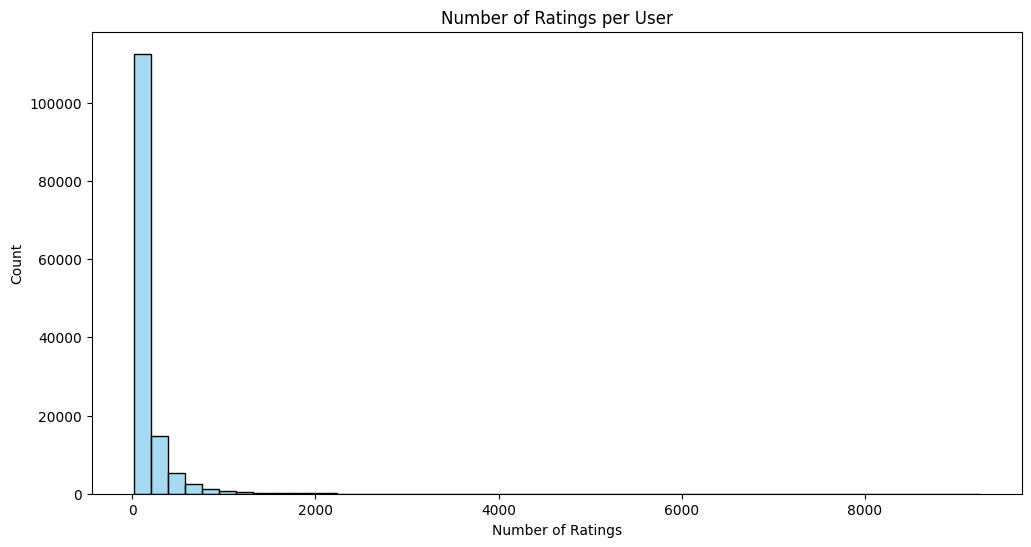

In [6]:
user_ratings_count = rating_df.groupby('userId')['rating'].count()
plt.figure(figsize=(12, 6))
sns.histplot(user_ratings_count, bins=50, kde=False, color='skyblue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

### Conclusion: 
#### The Conclusion that we can draw from EDA is that we have over 100k data in rating.csv file so we have to Train our model on a smaller fraction. 
#### Also, We have an additional column `timestamp` that we don't have to use so we have to drop that column and proceed.
#### There are no null values so it doesn't affect our Collaborative Filtering model.